# Linear Regression

In this first exercice, we will create linear regression models and emphasize how to use sklearn to do so.

We will start with a simple modeling of two data points and then focus on the practical steps needed to apply them to more complicated situations.

## 1. Predicting Apartement Prices

We will create a linear regression model and apply it to a simple dataset to get insights about the process and the theory. The idea is to start simple, get insights, and then add complexity.

[Scikit-Learn](https://scikit-learn.org/stable/) is a Python library containing a lot of machine learning algorithm implementations. You will see that it allows us to do a linear regression in [a few line of code](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)!

We will use some data about the price of Paris apartments. We took two apartments located in the third arrondissement of Paris from the website [seloger](https://www.seloger.com/list.htm?tri=initial&enterprise=0&idtypebien=2,1&idtt=2,5&naturebien=1,2,4&ci=750103), and reported the area (in square meters) and the price (in euros):

Square Meters | Price
:---:|:---:
39   |550000
47   |577000

The goal is to model the relation between the area (the feature or independent variable of our model) and the price (the ground truth or the dependent variable).

Let's start by importing the librairies we'll use:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 1.1 Data Structure

We need to create a small dataset with these data. Many ways are possible to structure your data. However, we want data to be easily pluged as input of machine learning libraries like sklearn.

Your can go on the [LinearRegression documentation of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and have a look. We will use the `fit()` method of the class `LinearRegression` to get the model's parameters from our data (the two apartments). Your first job is to structure the data of the two apartments in a shape usable as input of a Sklearn linear model.


In [ ]:
# Your code here

We can read in the documentation that:

```
X : array-like or sparse matrix, shape (n_samples, n_features)
Training data

y : array_like, shape (n_samples, n_targets)
Target values. Will be cast to X’s dtype if necessary
```

This tells us how to input data into the model. The feature values and the real values are given separately as two arguments `X` and `y`.

`X` need to be an `array-like` (for instance, a Python list or a Numpy array) or a `sparse matrix` (for instance created from `scipy.sparse` methods). The shape of `X` is `(n_samples, n_features)`: the number of rows corresponds to the number of observation (in our case the number of apartments) and the number of columns to the number of feature (in our case, only 1: the area in square meters).

We will create a two-dimensional Numpy array `X`:


In [247]:
X = np.array([[39], [47]])


When we manipulate vectors and matrices, this is very important to check their shapes along the way. This will prevent a lot of bugs. So, let's do that and have a look at `X`'s shape:

In [248]:
X.shape

(2, 1)

Is it corresponding to what we want (`(n_samples, n_features)`)? Our dataset is composed of two samples (apartments) and one feature (square meters) so this looks good! Looking at `X` is also helpful to check that everything is what we expect:

In [249]:
X

array([[39],
       [47]])

This matrix (or array, using the terminology of Numpy) has two rows and one column.

Note that in the context of machine learning, Numpy arrays are programming data structure used to represent mathematical concepts of vectors and matrices. In this case, `X` is a two-dimensional array but could also be considered as a column vector.

Then we will create the array `y` storing the target values. Target values are the true values of our apartment prices. The documentation says that the shape of `y` is `(n_samples, n_targets)`. Again, `n_samples` is the number of apartments and `n_targets` is the number of predicted values: in our case, this is one (the price). We have to be careful to the order of the values: the first row of `X` has to correspond to the first row of `y`.

Let's create `y` from data in the table above, check its shape and have a look at it, like we did with `X`:

In [251]:
y = np.array([550000, 577000])

# This is equivalent to y = np.array([[550000], [577000]])
# because Numpy will broadcast y with the shape of X
# (cf. doc: "Will be cast to X’s dtype if necessary").

In [252]:
y.shape

(2,)

In [253]:
y

array([550000, 577000])

### 1.2. Data Visualization

Now, that you have created the dataset with variables `X` and `y`, we will have a look at the data. Data visualization is useful to check that everything is what we expected.

Your next job is to create a scatter plot showing the price ($y$ axis) in function of the area in square meters ($x$ axis).

In [ ]:
# Your code here

Text(0, 0.5, 'Price (euros)')

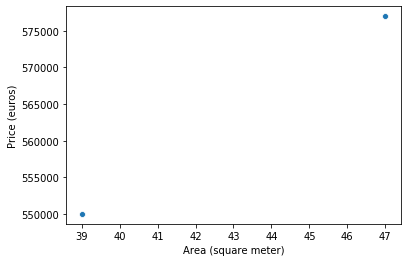

In [256]:
sns.scatterplot(X.flatten(), y)
plt.xlabel('Area (square meter)')
plt.ylabel('Price (euros)')

Text(0, 0.5, 'Price (euros)')

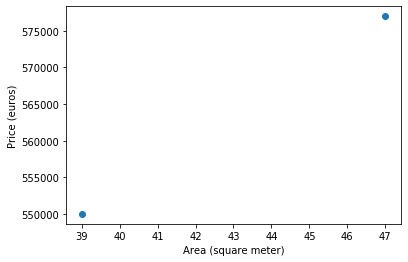

In [257]:
plt.scatter(X, y)
plt.xlabel('Area (square meter)')
plt.ylabel('Price (euros)')

### 1.3. Modeling

Before feeding your data to any machine learning algorithm, ask yourself the question: "how would I do the task manually?". If the answer is not obvious, the problem might need to be reframed. Here, we want to fit a line to our data. Since there are only two datapoints, this line can perfectly fit the data: this is the line passing by both points.

It can be easy to get lost while building a machine learning pipeline. Starting with a simple case will allow us to easily check that the algorithm is working as expected and create a healthy workflow.

Your task is now to create a linear regression model with Sklearn and fit our dataset. To check that it worked, use the method `score()` from `LinearRegression`: it should return a score of 1, corresponding to a perfect fit.

In [ ]:
# Your code here


In [266]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

That was not that hard! We can check that there is no error in the fit since there are only two points:

In [267]:
reg.score(X, y)

1.0

### 1.4. Plot the Regression Line

That's all! We trained our first linear regression algorithm! Now you will plot the regression line to be sure that it passes through our two points.

- 1. Get our model's parameters (corresponding to the intercept and the slope).
- 2. Plot the regression line along with the scatter plot of our apartments (the two points).

In [268]:
# Your code here

**1- Get the model's parameters**

In [269]:
a, b = reg.coef_, reg.intercept_ 

**2- Plot the regression line**

Since Matplotlib undertands only mapping between the $x$ and the $y$ axis, we need to convert the line equation given by $a$ and $b$ to pairs of values corresponding to $x$ and $y$. The equation of a line is:

$$
y = ax + b
$$

with $x$ and $y$ our two axes, $a$ the slope of the line and $b$ the intercept.

We would need only two $(x, y)$ pairs to draw the line. However, let's use a more general way to plot mathematical functions (not only linear ones). We will create an array corresponding to all $x$ values of the mapping with values from a minimum to a maximum

In [270]:
x_line = np.arange(35, 50)

And then, calculate the corresponding $y$ value for each element of this array:

In [271]:
y_line = a * x_line + b

We can plot these mappping with the following code:

Text(0, 0.5, 'Price (euros)')

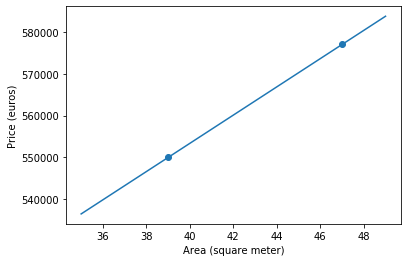

In [272]:
plt.plot(x_line, y_line)
plt.scatter(X, y)
plt.xlabel('Area (square meter)')
plt.ylabel('Price (euros)')

It looks good! The regression line passes through our data points!

### 1.5. New Apartment Price Prediction

You will now create the last block of our machine learning pipeline: the price prediction of a new apartment using the area feature as input.

Your friend Bob is asking for advice as he wants to sell his apartment. He gives you the area in square meters and ask you how much could he sell it. Your task is to use your model to predict the price of Bob's apartment:

Square Meters | Price
:---:|:---:
34   |?

Feel free to use the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). It is great and shows examples.

In [9]:
# Your code here


In [57]:
reg.predict(np.array([[34]]))

array([[533125.]])

<details>
  <summary>Meanwhile, Bob sold his apartment. Here is the true price.</summary>
  He sold it for 445000 euros.
</details>

What do you think of your prediction? Is it accurate?


### 1.6. More data

Now that we have created a linear regression model and applied it to our two apartments, let's try to improve our model by using more apartments.

You will train a new linear regression model with more data and try again to predict the price of the last apartment.

Square Meters | Price
:---:|:---:
32   |489,000
28   |336,000
47   |494,000
7    |85,000
85   |1,595,000
12   |130,000
16   |173,000
53   |520,000
30   |320,000
41   |660,000

Try to use these new data to train your model. You can use the same kind of workflow:

- Create the input data structure `X` and `y`.
- Check shape of input data.
- Have a look at the data with visualization.
- Clarify the problem we are trying to solve.
- Train the model using sklearn (don't include Bob's apartment).
- Predict again the price of Bob's apartement.


In [ ]:
# You code here


Here is the data structure we need for our data:

In [273]:
X = np.array([[32], [28], [47], [7], [85], [12], [16], [53], [30], [41]])
y = np.array([489000, 336000, 494000, 85000, 1595000, 130000, 173000, 520000, 320000, 660000])


<div class='solution'>

As we have seen, this is almost always a good idea to start with a visual representation of the data. Try to do a scatter plot with $y$ in function of $X$ like we did it above.

Text(0, 0.5, 'Price (euros)')

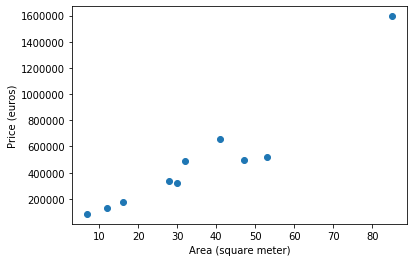

In [274]:
plt.scatter(X, y)
plt.xlabel('Area (square meter)')
plt.ylabel('Price (euros)')

It looks good! We can see that the apartment price insreases with the area, which makes sense.

Let's do the regression:

In [276]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now that we have our model, we can try again to predict Bob's apartment price:

In [277]:
reg.predict(np.array([[34]]))

array([460689.82755361])

We can see that the predicted price is around 460,000 euros with our new model. This is closer to the real price (445,000 euros).

</div>

Adding few observations in our training set has improved our model.